In [1]:
from resources.helper.helper_dataset import get_dataloaders_cifar10
from resources.helper.helper_evaluation import set_all_seeds, set_deterministic
from resources.helper.helper_train import train_model
from resources.helper.helper_plotting import plot_training_loss, plot_accuracy, show_examples

import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
resize_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
test_resize_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

train_loader, valid_loader, test_loader = get_dataloaders_cifar10(batch_size=256,validation_fraction=0.1, 
                                                                train_transforms=resize_transform,test_transforms=resize_transform)

In [4]:
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch dimensions: torch.Size([256, 3, 32, 32])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([2, 0, 4, 0, 9, 4, 0, 4, 7, 2])


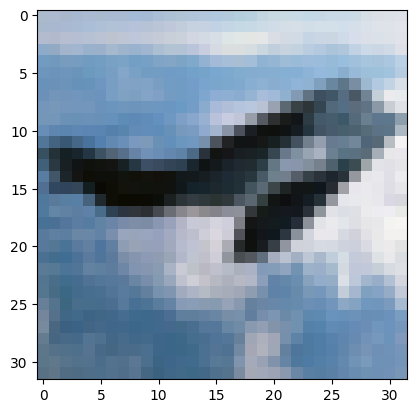

In [5]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
img = images[1]
img = img / 2 + 0.5
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))

plt.show()


In [6]:
class ConvNet(torch.nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.num_classes = num_classes
        self.layers = torch.nn.Sequential(
                torch.nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
                torch.nn.BatchNorm2d(32),
                torch.nn.LeakyReLU(0.1, inplace=True),
                
                torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
                torch.nn.BatchNorm2d(64),
                torch.nn.LeakyReLU(0.1, inplace=True),
                
                torch.nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1),
                torch.nn.BatchNorm2d(64),
                torch.nn.LeakyReLU(0.1, inplace=True),
                
                torch.nn.Flatten(),
                torch.nn.Linear(4096, 128),
                torch.nn.BatchNorm1d(128),
                torch.nn.LeakyReLU(0.1, inplace=True),
                torch.nn.Dropout(0.5),
                
                torch.nn.Linear(128, num_classes),
                )

    def forward(self, x):
        logits = self.layers(x)
        return logits

Epoch: 001/005 | Batch 0000/0175 | Loss: 2.3990
Epoch: 001/005 | Batch 0050/0175 | Loss: 1.6064
Epoch: 001/005 | Batch 0100/0175 | Loss: 1.4435
Epoch: 001/005 | Batch 0150/0175 | Loss: 1.4282
Epoch: 001/005 | Train: 49.43% | Validation: 47.76%
Time elapsed: 0.53 min
Last lr:  [0.1]
Epoch: 002/005 | Batch 0000/0175 | Loss: 1.3054
Epoch: 002/005 | Batch 0050/0175 | Loss: 1.1179
Epoch: 002/005 | Batch 0100/0175 | Loss: 1.2480
Epoch: 002/005 | Batch 0150/0175 | Loss: 1.1324
Epoch: 002/005 | Train: 56.20% | Validation: 54.54%
Time elapsed: 1.03 min
Last lr:  [0.1]
Epoch: 003/005 | Batch 0000/0175 | Loss: 1.0990
Epoch: 003/005 | Batch 0050/0175 | Loss: 1.0007
Epoch: 003/005 | Batch 0100/0175 | Loss: 1.0249
Epoch: 003/005 | Batch 0150/0175 | Loss: 1.0027
Epoch: 003/005 | Train: 68.42% | Validation: 64.24%
Time elapsed: 1.52 min
Last lr:  [0.1]
Epoch: 004/005 | Batch 0000/0175 | Loss: 0.9908
Epoch: 004/005 | Batch 0050/0175 | Loss: 1.0211
Epoch: 004/005 | Batch 0100/0175 | Loss: 0.8661
Epoch: 

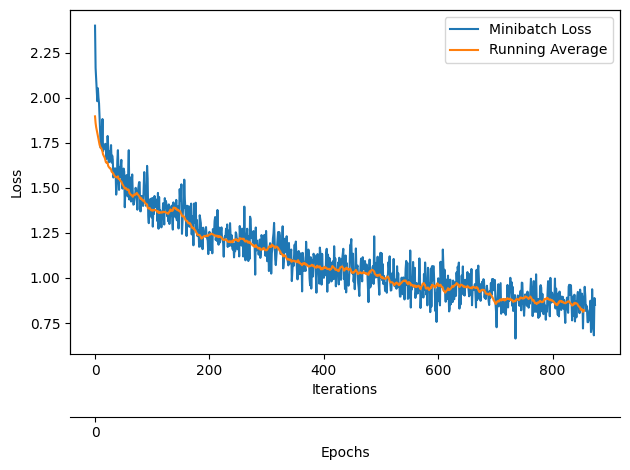

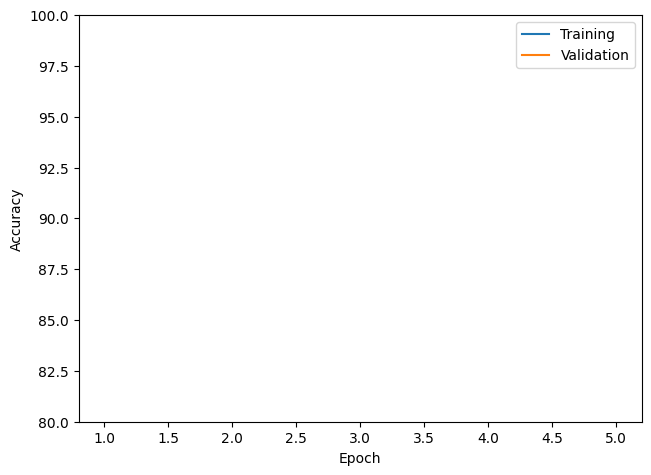

In [7]:
model=ConvNet(10)
model=model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,factor=0.1, mode='max')
Epochs=5
minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=Epochs,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=device,
    logging_interval=50,
    scheduler=scheduler,
    scheduler_on='valid_acc')

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=Epochs,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)

plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)

plt.ylim([80, 100])
plt.show()